# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs1/20250226_sparc4acs1_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs1/20250226_s4c1_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs1/20250226_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs1/20250226_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs1/20250226_s4c1_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:54.580000,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:55.700073,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:56.820146,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:57.940218,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:59.060291,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:46:52.980000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,8,L4,None,True
1392,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:48:55.427000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,9,L4,None,True
1393,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:50:57.822000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,10,L4,None,True
1394,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:53:00.327000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,11,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs1/20250226_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   45R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   45R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   45R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   45R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   45R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

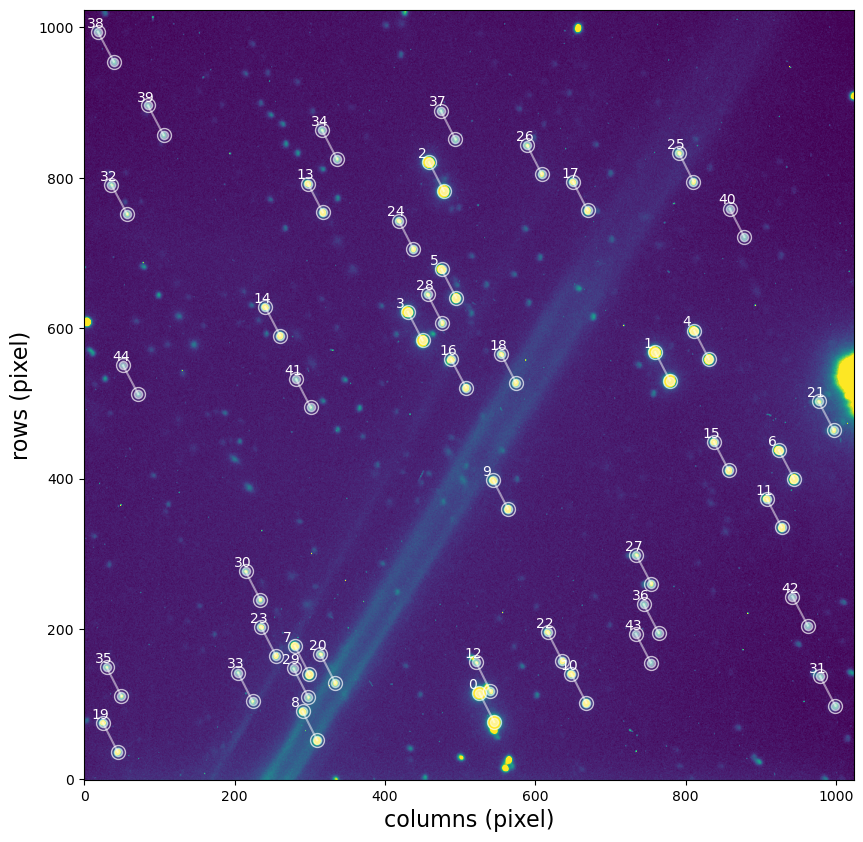

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553062,-38.759751,545.341198,76.228745,6.190230,6.190230,-9.393699,0.001524,-7.958742,0.001090,10,0
1,1,189.527398,-38.716366,778.907509,530.387528,6.847030,6.847030,-9.100256,0.001813,-7.950649,0.001121,10,0
2,2,189.564740,-38.693908,478.310944,782.524262,6.473009,6.473009,-8.911131,0.002028,-7.938896,0.001069,10,0
3,3,189.567108,-38.712642,450.059498,583.742032,6.534641,6.534641,-8.672263,0.002394,-7.954817,0.001284,10,0
4,4,189.521328,-38.713481,830.781254,559.069027,6.906498,6.906498,-7.913168,0.004024,-7.945548,0.001233,10,0
5,5,189.562027,-38.707177,494.725655,640.428151,6.462967,6.462967,-7.760070,0.004515,-7.953521,0.001230,10,0
6,6,189.506986,-38.727929,943.977713,399.634239,7.018107,7.018107,-7.676136,0.004896,-7.959602,0.001402,10,0
7,7,189.582849,-38.754818,299.612124,139.438960,6.044269,6.044269,-7.220027,0.007240,-7.973491,0.001648,10,0
8,8,189.581142,-38.762959,309.898076,51.835521,5.924634,5.924634,-6.927041,0.012076,-8.003283,0.003288,10,0
9,9,189.552335,-38.733189,563.556146,359.790824,6.450674,6.450674,-6.842939,0.011682,-7.985948,0.002706,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

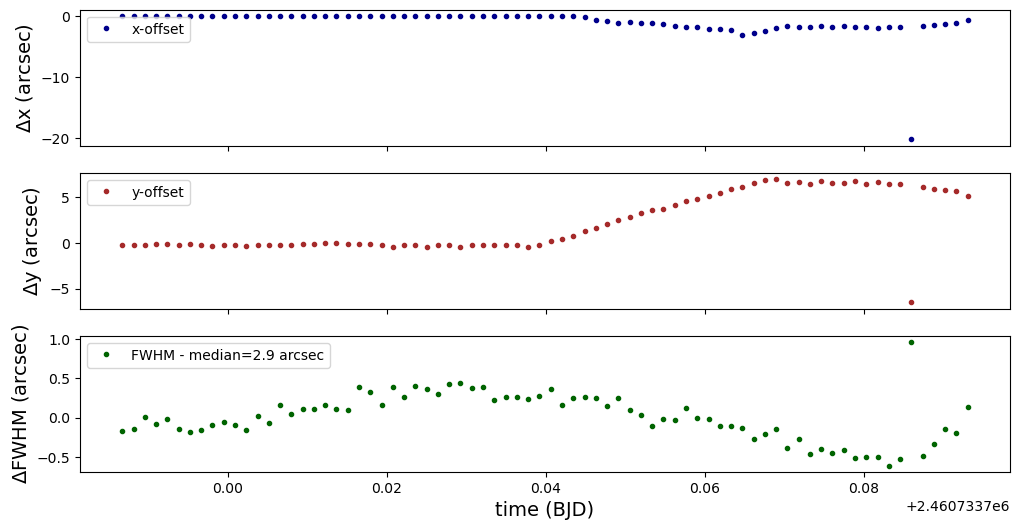

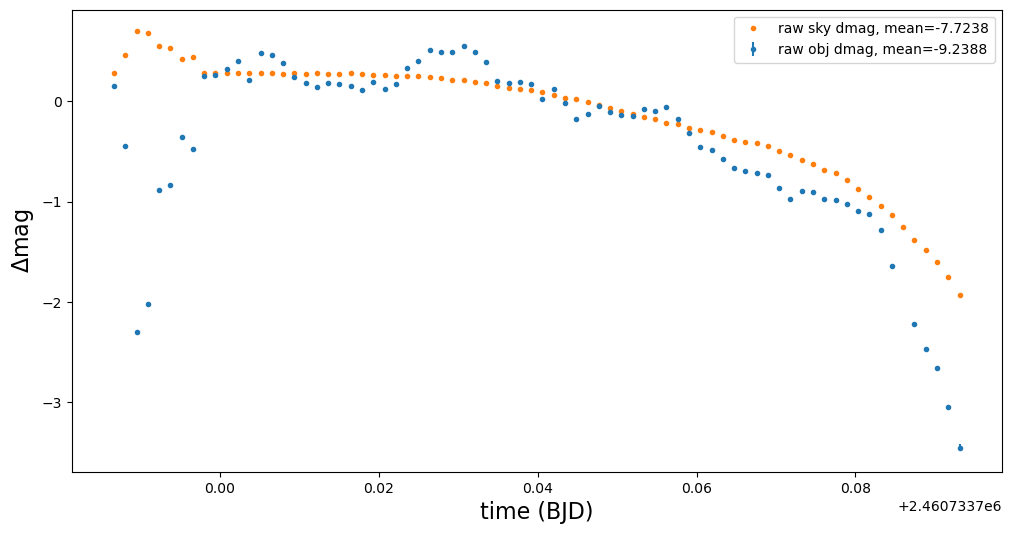

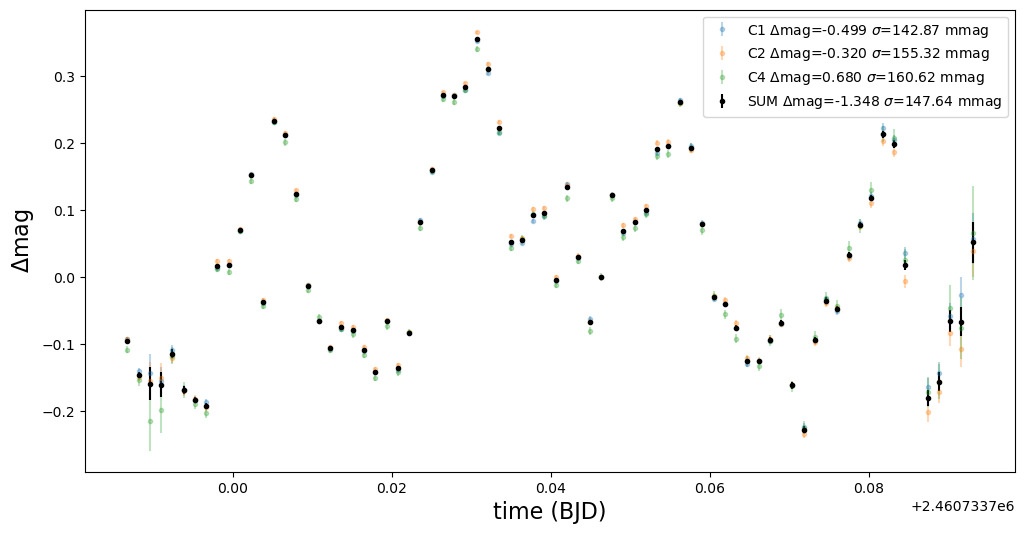

       TIME                x          ...      diffmagsum     
------------------ ------------------ ... --------------------
   2460733.6867162 440.24707038206174 ... -0.09523432742064486
2460733.6881356305 440.24707038206174 ...  -0.1462051727565239
2460733.6895537875 440.24707038206174 ... -0.15913259786948153
2460733.6909728823 440.24707038206174 ... -0.16079860655638623
2460733.6923896046 440.24707038206174 ... -0.11471156476609679
 2460733.693809012 440.24707038206174 ... -0.16936556156752047
 2460733.695225468 440.24707038206174 ... -0.18368460878920878
               ...                ... ...                  ...
2460733.7845805986 434.99707038206174 ... 0.017715188922808878
2460733.7859973195 379.49707038206174 ...                  nan
2460733.7874159045 435.49707038206174 ...  -0.1804268620856435
 2460733.788833204 435.74707038206174 ... -0.15661114831095357
 2460733.790249902 436.24707038206174 ... -0.06620218880952677
 2460733.791667873 436.74707038206174 ... -0.0665910344

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=3
comps=[1,2,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs1/20250226_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     483   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU    690   45R x 339C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0073,EFE0073,FO0074,EFO0074,FE0074,EFE0074,FO0075,EFO0075,FE0075,EFE0075
0,2.0,10.0,0.0,189.553062,-38.759751,525.735532,114.687136,545.341198,76.228745,5.998476,...,535.342253,5.394171,312.631687,4.986039,374.926609,5.163511,181.185289,4.699817,209.260009,4.782431
1,2.0,10.0,1.0,189.527398,-38.716366,759.403856,568.163296,778.907509,530.387528,6.521004,...,406.088529,5.230494,256.509203,4.939435,278.717542,4.909424,158.758000,4.715690,181.972237,4.709577
2,2.0,10.0,2.0,189.564740,-38.693908,458.752379,820.674289,478.310944,782.524262,6.117236,...,364.952346,5.035906,229.366001,4.798485,259.697257,4.812389,139.449651,4.537982,154.429519,4.517669
3,2.0,10.0,3.0,189.567108,-38.712642,430.434643,621.787995,450.059498,583.742032,6.172462,...,237.227098,4.976885,156.612901,4.808449,173.093164,4.725427,105.115350,4.566074,121.737794,4.591783
4,2.0,10.0,4.0,189.521328,-38.713481,811.286675,596.773579,830.781254,559.069027,6.499678,...,142.414855,5.075438,91.925008,4.920941,97.270833,4.844095,53.535355,4.686106,60.633039,4.773942
5,2.0,10.0,5.0,189.562027,-38.707177,475.262821,678.273810,494.725655,640.428151,6.175261,...,121.278356,4.962262,75.217283,4.733476,90.016780,4.713978,49.437561,4.519083,51.923235,4.537096
6,2.0,10.0,6.0,189.506986,-38.727929,923.990322,437.685570,943.977713,399.634239,6.649576,...,83.423136,4.957288,60.544410,4.780919,63.397665,4.816824,36.228955,4.659705,43.431996,4.657638
7,2.0,10.0,7.0,189.582849,-38.754818,280.089170,177.661902,299.612124,139.438960,5.874096,...,61.181061,4.862424,50.738934,4.598840,50.752313,4.687671,33.700335,4.496211,35.850352,4.515520
8,2.0,10.0,8.0,189.581142,-38.762959,290.577187,90.283977,309.898076,51.835521,5.991556,...,38.603991,4.962602,25.732954,4.671471,18.419127,4.748378,10.459575,4.572991,15.489429,4.606320
9,2.0,10.0,9.0,189.552335,-38.733189,544.004149,397.587581,563.556146,359.790824,6.298994,...,53.586330,4.862099,30.090014,4.620563,34.425521,4.559139,24.596077,4.483559,23.329434,4.445097


Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0073', 'EFE0073', 'FO0074', 'EFO0074', 'FE0074', 'EFE0074', 'FO0075',
       'EFO0075', 'FE0075', 'EFE0075'],
      dtype='object', length=339)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:22:58,612 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:22:58,612 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:22:58,621 root - INFO - Source index: i=3   [pipeline_lib]


2025-09-18 00:22:58,621 | INFO | Source index: i=3 


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:22:58,622 root - INFO - Source RA=189.5671083065068 Dec=-38.71264222275618 mag=nan+-nan  [pipeline_lib]


2025-09-18 00:22:58,622 | INFO | Source RA=189.5671083065068 Dec=-38.71264222275618 mag=nan+-nan


2025-09-18 00:22:58,623 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-18 00:22:58,623 | INFO | Best aperture radius: 15.0 pixels


2025-09-18 00:22:58,624 root - INFO - Polarization in Q: 0.007+-0.001  [pipeline_lib]


2025-09-18 00:22:58,624 | INFO | Polarization in Q: 0.007+-0.001


2025-09-18 00:22:58,624 root - INFO - Polarization in U: -0.002+-0.002  [pipeline_lib]


2025-09-18 00:22:58,624 | INFO | Polarization in U: -0.002+-0.002


2025-09-18 00:22:58,625 root - INFO - Polarization in V: -0.0015+-0.0009  [pipeline_lib]


2025-09-18 00:22:58,625 | INFO | Polarization in V: -0.0015+-0.0009


2025-09-18 00:22:58,626 root - INFO - Total linear polarization p: 0.007+-0.001  [pipeline_lib]


2025-09-18 00:22:58,626 | INFO | Total linear polarization p: 0.007+-0.001


2025-09-18 00:22:58,627 root - INFO - Angle of polarization theta: 170+-5 deg  [pipeline_lib]


2025-09-18 00:22:58,627 | INFO | Angle of polarization theta: 170+-5 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:22:58,629 root - INFO - Free constant k: 0.8981925832615949+-0.0  [pipeline_lib]


2025-09-18 00:22:58,629 | INFO | Free constant k: 0.8981925832615949+-0.0


2025-09-18 00:22:58,629 root - INFO - Zero of polarization: 28.2+-0.0  [pipeline_lib]


2025-09-18 00:22:58,629 | INFO | Zero of polarization: 28.2+-0.0


2025-09-18 00:22:58,630 root - INFO - RMS of zi residuals: 0.008833475576604416  [pipeline_lib]


2025-09-18 00:22:58,630 | INFO | RMS of zi residuals: 0.008833475576604416


2025-09-18 00:22:58,631 root - INFO - Reduced chi-square (n=75.0, DOF=72.0): 2.46  [pipeline_lib]


2025-09-18 00:22:58,631 | INFO | Reduced chi-square (n=75.0, DOF=72.0): 2.46


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:22:58,717 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:22:58,717 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:22:58,722 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:22:58,722 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:22:58,950 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:22:58,950 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:22:58,956 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:22:58,956 | INFO | Substituting symbol \perp from STIXGeneral


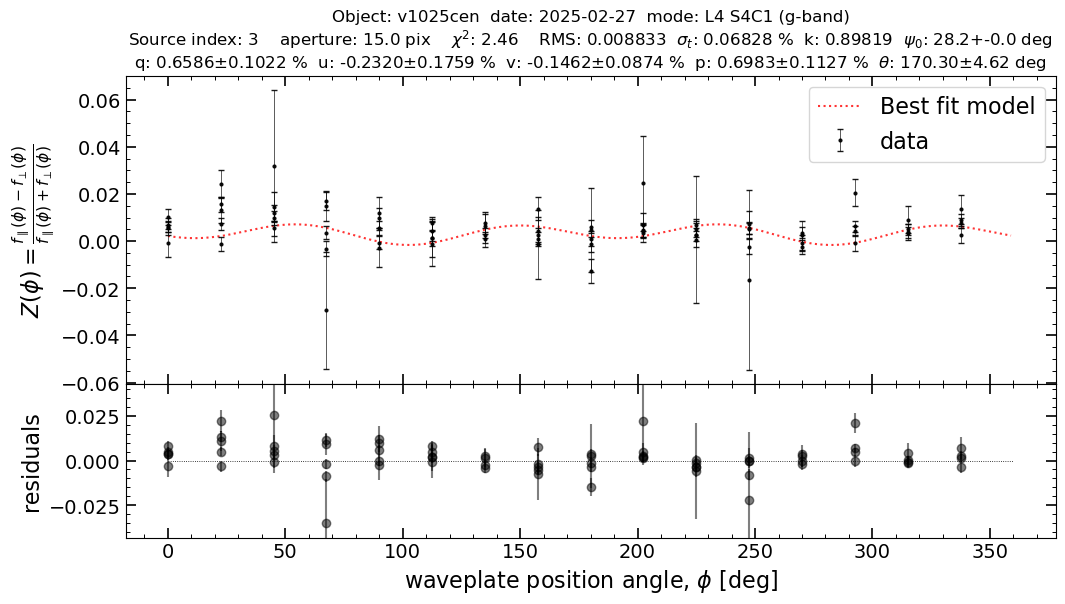

In [11]:
source_index = 3

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs1/20250226_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 3
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 5
APERTURE_RADIUS : 15.0
NEXPS : 76
MAG : nan+-nan
RA : 189.5671083065068
DEC : -38.71264222275618
FWHM : 6.172461935518973
X1 : 430.4346426542237
Y1 : 621.7879952260992
X2 : 450.0594981098998
Y2 : 583.742032097823
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5]
ZI : [0.006+-0.003, 0.013+-0.005, 0.03+-0.03, ..., 0.02+-0.02, 0.00+-0.03,
 -0.02+-0.04]


And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.7+-0.1 %  Angle of polarization: 170+-5 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

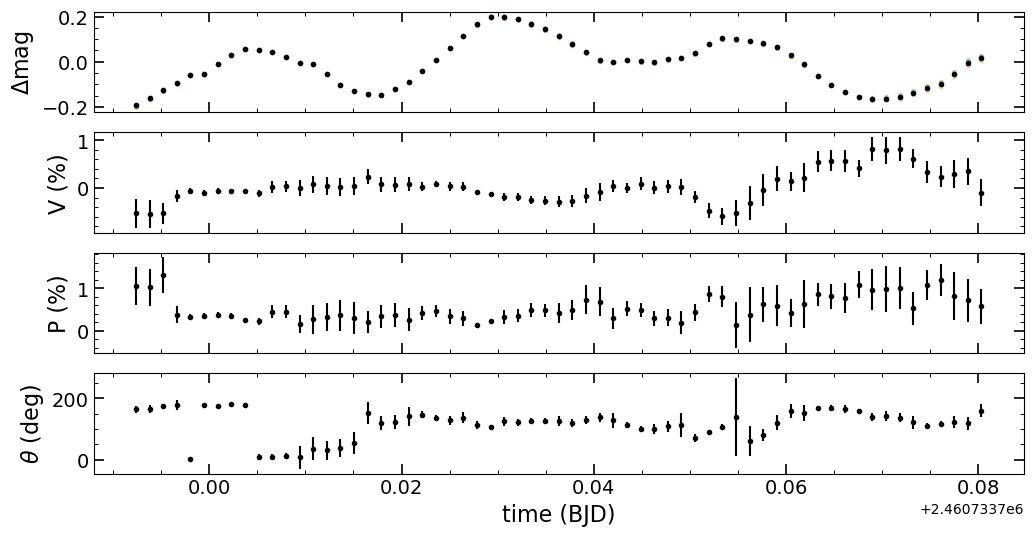

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.19012116714645977,0.002152927692120554,-0.1975041319374089,0.0022254226690727554,-0.1992908654082406,0.0035318623005074525,2460733.6923736394,430.4346426542237,621.7879952260992,450.0594981098998,583.742032097823,5.930524684932074,-10.93975463119824,0.001855939123111986,-12.434585156531831,0.003424635006416768,-0.19344585951589188,0.01066262341768319,0.00448586360291329,163.67852793330908,12.032282677314758
-0.16132840594793763,0.0021130020569753234,-0.16611780714695534,0.00218843077044198,-0.1668934341847219,0.0035159224004263274,2460733.693792879,430.4346426542237,621.7879952260992,450.0594981098998,583.742032097823,5.930524684932074,-10.967899275291426,0.001809820965228212,-12.432369435960013,0.0034335639614080475,-0.1630854948508862,0.010226369607341964,0.0043431615646129665,164.70799725668581,12.14648262456227
-0.1262324514568931,0.0018827412198237962,-0.12815321414541359,0.0019532572129131193,-0.1312119292518723,0.003170187455594706,2460733.6952103414,430.4346426542237,621.7879952260992,450.0594981098998,583.742032097823,5.971743450521611,-11.106569718582495,0.0015970931315259585,-12.534741550634669,0.003123763328411515,-0.1267871662344735,0.013133209440546826,0.004220132857889878,173.14587910830252,9.190122207525315
-0.09519969627542402,0.0015374756785665156,-0.09660948149619841,0.0015959875081914114,-0.09694242780565787,0.0026107392117461167,2460733.6966294423,430.4346426542237,622.0379952260992,450.0594981098998,583.992032097823,5.930524684932074,-11.339849648065094,0.0012914204697635845,-12.736287315146061,0.0025930033418918186,-0.09505300126326688,0.003773230671985051,0.0019884610578015842,177.65352530227193,15.071961191073084
-0.057125446945301306,0.0012937525812293778,-0.0591168646261373,0.0013444750073613885,-0.058623973851466005,0.0022168400911523898,2460733.6980473567,430.4346426542237,622.0379952260992,450.0594981098998,583.992032097823,5.899881757526611,-11.541971036242675,0.0010738994334581228,-12.900521716194604,0.002221713032111165,-0.057166014134228504,0.0032400575606521126,0.0007008239875493606,3.347643711734493,6.186175914688883
-0.05585468486814271,0.001179106722936111,-0.0566259546343133,0.0012249825828018707,-0.057023236563571444,0.002012648615368045,2460733.6994657107,430.4346426542237,621.7879952260992,450.0594981098998,583.742032097823,5.899881757526611,-11.647082448041894,0.0009769030919170834,-13.00383872721137,0.002019557002956963,-0.05537161335177565,0.0034640718391221116,0.0007056598475933858,179.346690663322,5.826054590797822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.019016736808827872,0.002237608390704485,0.006079469249787195,0.0023317009888087917,0.026213725817516575,0.003974931194813631,2460733.7803112175,425.6846426542237,642.5379952260992,445.3094981098998,604.492032097823,5.089550799567357,-10.488871776118403,0.001835408666159902,-11.774191336516362,0.004017166152827253,0.0160651054197416,0.00573176536602071,0.004130494439103574,159.8769886064651,20.610079690051183
nan,nan,nan,nan,nan,nan,2460733.7817285005,425.1846426542237,642.0379952260992,444.8094981098998,603.992032097823,5.089550799567357,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=3, 
                             comps=[1,2,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)